In [26]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Detect concept change for attributes stream data


In [31]:

#### Use Hawkins CUSUM Method described in http://rmgsc.cr.usgs.gov/outgoing/threshold_articles/Hawkins_Zamba2005b.pdf
#### and in Douglas C. Montgomery Statistical Quality Control 6th Edition Page 400-Page 417 Chapter Time-Weighted Control Charts
#### Tunable Parameters:
#### k : Allowance value, a threshold that signals a possible shift starts at the current position
#### H : If CUSUM value goes beyond this value, conclude a shift has occured and the shift starts at the last point
####  whose CUSUM is larger than k Allowance value
#### Seperate k and H values are used for mean and var shift detection
#### Usage example: data = np.loadtxt("posShiftUpVar_70.txt", delimiter=",") shiftDetect(data)

def shiftDetectCont(data):
    
    cusums_mean_up = []   # Ci array for mean upper shift detection
    N_mean_up = [] # N+ array for mean upper shift detection
    n_mean_up = 0 # N1 = 0
    cusum_mean_up = 0   # C1 = 0 for mean upper shift detection
    cusums_mean_lo = []   # Ci array for mean lower shift detection
    N_mean_lo = [] # N+ array for mean lower shift detection
    n_mean_lo = 0 # N1 = 0
    cusum_mean_lo = 0   # C1 = 0 for mean lower shift detection
    
    cusums_var_up = [] # Ci array for var upper shift detection
    N_var_up = [] # N+ arrary for var upper shift detection
    n_var_up = 0 # N1 = 0
    cusum_var_up = 0 # C1 = 0 for var upper shift detection
    cusums_var_lo = [] # Ci array for var lower shift detection
    N_var_lo = [] # N+ arrary for var lower shift detection
    n_var_lo = 0 # N1 = 0
    cusum_var_lo = 0 # C1 = 0 for var lower shift detection
    
    n = 5 # The first n samples form the baseline
    i = 1 # The index looping through
    mean = np.mean(data[:n]) # mean of baseline
    sd = np.std(data[:n]) # std of baseline
    k = 2 * sd  # Allowance value for mean shift detection
    H = 12 * sd # Decision interval for mean shift detection
    k_v = 1 * sd # Allowance value for var shift detection
    if mean/sd <= 2:
        H_v = 1.5 * mean/sd * sd # Decision interval for var shift detection that mean and std are close
    else:
        H_v = 5* mean/sd *sd # Decision interval for var shift detection that std is much smaller than mean
    print ("mean of 50 samples = " + str(mean))
    print ("std of 50 samples = " + str(sd))
    print ("Allowance value of mean = " + str(k))
    print ("Decision interval of mean = " + str(H))
    print ("Allowance value of variance = " + str(k_v))
    print ("Decision interval of variance = " + str(H_v))
    
    plt.plot(data)
    plt.title("All Data Points")
    plt.show()
    
    #for x in data[n+1:]: # Start building CUSUM tabular from the n+1 point
    for x in data: # Start building CUSUM tabular 
        
        ## Tabular CUSUM for mean shift detection
        # mean upper shift CUSUM tabular generation
        cusum_mean_up = max(0, x - (mean + k) + cusum_mean_up) # Ci = max(0, xi-(mean+k)+Ci-1) for mean shift detection
        
        if cusum_mean_up == 0: # if cusum value is 0 
             n_mean_up = 0    # not start recording a possible shift change, set index Number to 0
        else:
             n_mean_up = n_mean_up + 1 # else if cusum value is not 0 
        N_mean_up.append(n_mean_up) # start recording a possible shift change, increment index Number by 1
            
        cusums_mean_up.append(cusum_mean_up) # Append CUSUM
        
        # mean lower shift CUSUM tabular generation
        cusum_mean_lo = max(0, (mean - k) - x + cusum_mean_lo) # Ci = max(0, (mean-k)-xi+Ci-1) for mean shift detection
        
        if cusum_mean_lo == 0: # if cusum value is 0 
             n_mean_lo = 0     # not start recording a possible shift change, set index Number to 0
        else:
             n_mean_lo = n_mean_lo + 1 # else if cusum value is not 0 
        N_mean_lo.append(n_mean_lo)   # start recording a possible shift change, increment index Number by 1
             
        cusums_mean_lo.append(cusum_mean_lo) # Append CUSUM 
        
        ## Tabular CUSUM for var shift detection
        ## Ci  for var shift detection,Hawkins metod: yi = (xi - mean)/std, vi = (sqrt(abs(yi)) - 0.822)/0.349
        ## Si+ = max(0,vi-k+Si-1) , Si- = max(0,-k-vi+Si-1)
        
        # var upper shift CUSUM tabular generation
        y = (x - mean)/sd
        if mean/sd <= 2:
           v = ((np.sqrt(abs(y))) - 0.822) / 0.01 # v for mean and std are very close like posVarup 60 file
        else:
           v = ((np.sqrt(abs(y))) - 0.822) / 0.03  #file for std is much smaller than mean like posVarup70 file
        
        cusum_var_up = max(0, v - k_v + cusum_var_up)
        
        if cusum_var_up == 0: # if cusum value is 0 
             n_var_up = 0     # not start recording a possible shift change, set index Number to 0
        else:
             n_var_up = n_var_up + 1 # else if cusum value is not 0 
        N_var_up.append(n_var_up)   # start recording a possible shift change, increment index Number by 1
        
        cusums_var_up.append(cusum_var_up) # Append CUSUM 
        
        # var lower shift CUSUM tabular generation
        # cusum_var_lo = max(0,-v - k_v + cusum_var_up)
        cusum_var_lo = abs(-v - k_v + cusum_var_up)
        
        if cusum_var_lo == 0: # if cusum value is 0 
             n_var_lo = 0     # not start recording a possible shift change, set index Number to 0
        else:
             n_var_lo = n_var_lo + 1 # else if cusum value is not 0 
        N_var_lo.append(n_var_lo)   # start recording a possible shift change, increment index Number by 1
        
        cusums_var_lo.append(cusum_var_lo) # Append CUSUM 
        
        
        i = i + 1
        ## Decide if shift in mean or var is detected
        if cusum_mean_up > H:
           
            c_i = i - (n_mean_up - 1) # The position where change right starts
            print("Mean shifted up at position " + str(c_i))
            
            print("CUSUM = " + str(cusums_mean_up))
            plt.plot(cusums_mean_up)
            plt.title("CUSUM of MEAN UP " + str(c_i) + " observations")
            plt.show()
            return
        
        if cusum_mean_lo > H:
            
            c_i = i - (n_mean_lo - 1) # The position where change right starts
            print("Mean shifted down at position " + str(c_i))
            print("CUSUM = " + str(cusums_mean_lo))
            plt.plot(cusums_mean_lo)
            plt.title("CUSUM of MEAN DOWN" + str(c_i) + " observations")
            plt.show()
            return
        
        
        if cusum_var_up > H_v:
            #c_i = i + n + 1 - (n_var_up - 1) # The position where change right starts
            c_i = i  - (n_var_up - 1)
            print("Variance shifted up at position " + str(c_i))
            print("CUSUM = " + str(cusums_var_up))
            plt.plot(cusums_var_up)
            plt.title("CUSUM of VAR up" + str(c_i) + " observations")
            plt.show()
            return
        
        if cusum_var_lo > H_v:
            #c_i = i + n + 1 - (n_var_lo - 1) # The position where change right starts
            c_i = i  - (n_var_lo - 1)
            print("Variance shifted down at position " + str(c_i))
            print("CUSUM = " + str(cusums_var_lo))
            plt.plot(cusums_var_lo)
            plt.title("CUSUM of VAR down" + str(c_i) + " observations")
            plt.show()
            return
        
       
    print("No Change")
    
    print("CUSUM = " + str(cusums_mean_up))
    plt.plot(cusums_mean_up)
    plt.title("CUSUM of mean up")
    plt.show()
    
    print("CUSUM = " + str(cusums_mean_lo))
    plt.plot(cusums_mean_lo)
    plt.title("CUSUM of mean down")
    plt.show()
    
    print("CUSUM = " + str(cusums_var_up))
    plt.plot(cusums_var_lo)
    plt.title("CUSUM of VAR up")
    plt.show()
    
    print("CUSUM = " + str(cusums_var_lo))
    plt.plot(cusums_var_lo)
    plt.title("CUSUM of VAR down")
    plt.show()
    #plt.plot(all_cusums)
    #plt.title("CUSUM of " + str(n) + " observations")
    #plt.show()
    return



In [42]:
#### Function to get detect concept change for attributes data
#### Assign char a,b,c to uniformly distributed value seperately for all data points first
#### Then, group data samples into sub group first,with each group has n data points,calculate the average of each subgroup
#### Therefore we get a new continous data array named sample
#### Plot the sample and a shift can be seen obviously
#### To-do: Experiment using p chart, or Shewart chart or CUSUM or other methods to detect the change position
#### and in Douglas C. Montgomery Statistical Quality Control 6th Edition Page 400-Page 417 Chapter Time-Weighted Control Charts
#### Tunable Parameters:
#### n : subgroup sample size n 
#### t: The first t data points be selected as baseline
## posTriple2_160,posTriple_175, posTripleDouble_175, negTriple,negWithRare,negBinary Verified

def shiftDetectAtt(lines):
    
    np.random.seed(123456789)

    data = [] # Initiate an array "data" to hold original attributes data 
    for x in lines:
        if x == 'a':    #  # Convert char a to a random number from 0 to 1 and append to data array
            #data.append(0) 
            data.append(np.random.uniform(0,1,1))
        if x == 'b':     # Convert char b to a random number from 1 to 2 and append to data array
            #data.append(1)
            data.append(np.random.uniform(1,2,1))
        if x == 'c':    # Convert char c to a random number from 2 to 3 and append to data array
            #data.append(2)
            data.append(np.random.uniform(2,3,1))
        

    n = 14 # Tunable parameter to group each n+1 data points into a new sample point
    m = len(data)/(n+1) # Number of samples converted from original data
    sample = [] # A new array to hold continous data converted from attributes data

    ## Fill in the new sample data array converted from original attributes data
    for i in range(int(m)):
        if i == 0:
            sample.append(sum(data[:n])/(n+1))   # Append the average values of each n+1 data points
        else:
            sample.append(sum(data[i*n+1:(i+1)*n])/(n+1))  # Append the average values of each n+1 data points

    print("Converted variable values are" + str(sample))

    t = 4 # Choose the first t+1 numbers of sample points as baseline

    ## Calculate control limits using P chart method
    mean = np.average(sample[:t]) # Get the mean of baseline data
    sd = np.std(sample[:t])
    #UCL = mean + 3*np.sqrt(mean*(1-mean)/(n+1)) # Upper control limit in P chart, does not work for negtriple, tripledouble
    #LCL = mean - 3*np.sqrt(mean*(1-mean)/(n+1)) # Lower control limit in P chart,does not work for negtriple, tripledouble
    UCL = mean + 3*sd # Upper control limit in Shewart method
    LCL = mean - 3*sd # Lower control limit in Shewart method
    UWL = mean + 2*sd # Upper control limit in Shewart method
    LWL = mean - 2*sd # Lower control limit in Shewart method

    print("mean is in Shewart method:" + str(mean)) # Print the mean value of the control chart
    print("UCL is in Shewart method: " + str(UCL))  # Print the UCL value of the control chart
    print("LCL is in Shewart method: " + str(LCL))  # Print the LCL value of the control chart
    print("UWL is in Shewart method: " + str(UWL))  # Print the UCL value of the warning chart
    print("LWL is in Shewart method: " + str(LWL))  # Print the LCL value of the warning chart
    print(str(range(t+1,len(sample))))
    print(str(sample[5]))
    
    #N = [] # Array to record outside threhold points index in a trend
    n = 0 # index starts from 0 which means not a point outsidte control threshold
    m = 0 # index starts from 0 which means not a point outsidte warning threshold
    ## Detect if there is concept change occurs after the baseline sample points
    for i in range(t+1,len(sample)):
        if (sample[i] >= UCL) | (sample[i] <= LCL): # If there is a point outside threshold
            n = n + 1
            #N.append(n)
            if n == 3: # If it is the consecutive 3rd point that is outside threshold
                print("Concept change occured at position " + str((i-2)*(n+1)) + "of original attributes data")
                print("That corresponds to the "+str(i-2)+"th position on the converted data graph below")
                print("The change occur sample value is"+str(sample[i-2]))
                plt.plot(sample) # Plot the converted variable smaple data 
                plt.plot([0, len(sample)], [UCL, UCL], 'r--', color='r')  # Plot the Upper Control Limit
                plt.plot([0, len(sample)], [LCL, LCL], 'r--', color='r') # Plot the Lower Control LIMIT
                plt.text(1, UCL - 0.05, 'UCL',color='r') # Label out UCL 
                plt.text(1, LCL + 0.05, 'LCL',color='r') # Label out LCL 
                plt.plot([0, len(sample)], [UWL, UWL], 'r--', color='r')  # Plot the Upper Warning Limit
                plt.plot([0, len(sample)], [LWL, LWL], 'r--', color='r') # Plot the Lower Warning LIMIT
                plt.text(1, UWL - 0.05, 'UWL',color='r') # Label out UWL 
                plt.text(1, LWL + 0.05, 'LWL',color='r') # Label out LWL 
                plt.title("Converted Variable Plot from Original Attributes Data,Change Ocurred")
                plt.show()
                return i - 2
        elif (sample[i] >= UWL) | (sample[i] <= LWL): # If there is a point outside warning threshold:
            m = m + 1
            if m == 5: # If it is the consecutive 3rd point that is outside threshold
                print("Concept change occured at position " + str((i-4)*(n+1)) + "of original attributes data")
                print("That corresponds to the "+str(i-2)+"th position on the converted data graph below")
                print("The change occur sample value is"+str(sample[i-4]))
                plt.plot(sample) # Plot the converted variable smaple data 
                plt.plot([0, len(sample)], [UCL, UCL], 'r--', color='r')  # Plot the Upper Control Limit
                plt.plot([0, len(sample)], [LCL, LCL], 'r--', color='r') # Plot the Lower Control LIMIT
                plt.text(1, UCL - 0.05, 'UCL',color='r') # Label out UCL 
                plt.text(1, LCL + 0.05, 'LCL',color='r') # Label out LCL
                plt.plot([0, len(sample)], [UWL, UWL], 'r--', color='r')  # Plot the Upper Warning Limit
                plt.plot([0, len(sample)], [LWL, LWL], 'r--', color='r') # Plot the Lower Warning LIMIT
                plt.text(1, UWL - 0.05, 'UWL',color='r') # Label out UWL 
                plt.text(1, LWL + 0.05, 'LWL',color='r') # Label out LWL 
                plt.title("Converted Variable Plot from Original Attributes Data,Change Ocurred")
                plt.show()
                return i - 4
        else:
            n = 0
            m = 0
        
    shiftDetectCont(sample)       
    
    print("No Change")
    plt.plot(sample) # Plot the converted variable smaple data 
    plt.plot([0, len(sample)], [UCL, UCL], 'r--', color='r')  # Plot the Upper Control Limit
    plt.plot([0, len(sample)], [LCL, LCL], 'r--', color='r') # Plot the Lower Control LIMIT
    plt.text(1, UCL - 0.05, 'UCL',color='r') # Label out UCL 
    plt.text(1, LCL + 0.05, 'LCL',color='r') # Label out LCL 
    plt.plot([0, len(sample)], [UWL, UWL], 'r--', color='r')  # Plot the Upper Control Limit
    plt.plot([0, len(sample)], [LWL, LWL], 'r--', color='r') # Plot the Lower Control LIMIT
    plt.text(1, UWL - 0.05, 'UWL',color='r') # Label out UCL 
    plt.text(1, LWL + 0.05, 'LWL',color='r') # Label out LCL 
    plt.title("Converted Variable Plot from Original Attributes Data")
    plt.show()

    return -1




  

Converted variable values are[array([ 1.13609049]), array([ 0.78834272]), array([ 1.03071131]), array([ 1.09551696]), array([ 0.94734628]), array([ 1.00795232]), array([ 0.70951914]), array([ 1.16689971]), array([ 1.15685959]), array([ 0.88990495]), array([ 0.91420452]), array([ 0.75099356]), array([ 0.49374622]), array([ 0.81785645]), array([ 0.60462383]), array([ 0.5366467]), array([ 0.67840606]), array([ 0.65145783]), array([ 0.6734874]), array([ 0.39303896]), array([ 0.77708397])]
mean is in Shewart method:1.0126653702
UCL is in Shewart method: 1.4172330692
LCL is in Shewart method: 0.608097671199
UWL is in Shewart method: 1.28237716953
LWL is in Shewart method: 0.742953570866
range(5, 21)
[ 1.00795232]
Concept change occured at position 68of original attributes data
That corresponds to the 17th position on the converted data graph below
The change occur sample value is[ 0.65145783]


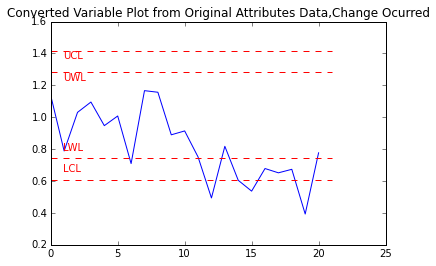

17

In [43]:
    with open('posBinary_150.txt') as f: # Open file as f
        lines = f.read().splitlines()  # Split file line by line and put lines in to var "lines"
    f.close() # Close file
    try:
        data = [float(i) for i in lines] # For variable dataa stream,convert data string to float if convertable
    except: 
        data = lines  # Otherwise for attribute data, no convert needed

    shiftDetectAtt(lines)
 
    